# Lesson 2 - 2023-01-31

# Limits

The limit of a function is the value the function takes when some parameter, usually x, tends to a value, usually either infinity, minus infinity, or zero.

We can use Python to try and find the limits of function, either numerically or symbolically.

In [1]:
import matplotlib.pylab as pl

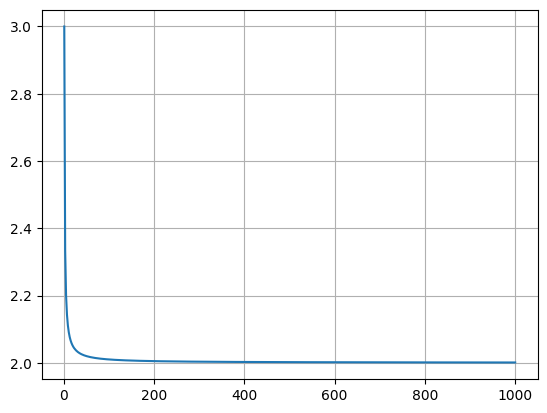

In [2]:
# Function 1 - f(x) = 2 + \frac{1}{x}
# This should tend to 2
space = pl.linspace(1, 1000, 500)

def fn1(x):
    return 2 + (1 / x)

fn1_y = fn1(space)

pl.plot(space, fn1_y) # The function tends to 2, just like we predicted.
pl.grid()

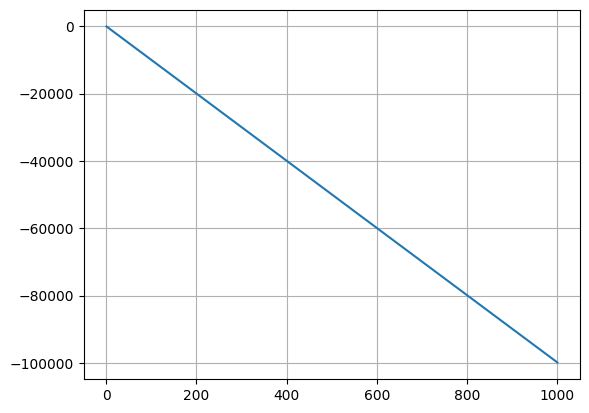

In [3]:
# Fun 2 - f(x) = 10 - 100 * x + 0.0001 * (x^2)

def fn2(x):
    return 10 - 100 * x + 0.0001 * (x ** 2)

fn2_y = fn2(space)
pl.plot(space, fn2_y)
pl.grid() # This seems to go down to -Inf, but it takes a long time for the x^2 to take over


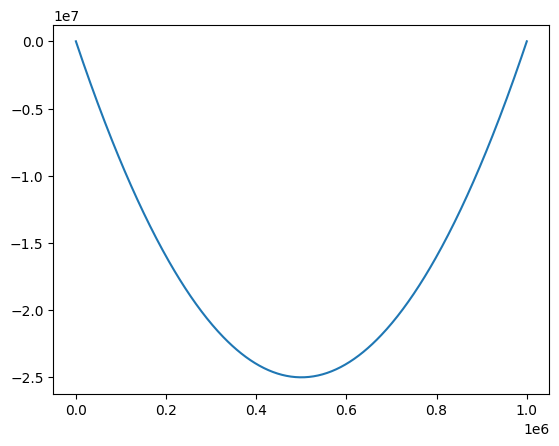

In [4]:
# Let's see it further apart...
space2 = pl.linspace(1, 1e6, 500)
pl.plot(space2, fn2(space2))

[1.00000000e+01 1.52641797e+01 2.32995181e+01 3.55648031e+01
 5.42867544e+01 8.28642773e+01 1.26485522e+02 1.93069773e+02
 2.94705170e+02 4.49843267e+02 6.86648845e+02 1.04811313e+03
 1.59985872e+03 2.44205309e+03 3.72759372e+03 5.68986603e+03
 8.68511374e+03 1.32571137e+04 2.02358965e+04 3.08884360e+04
 4.71486636e+04 7.19685673e+04 1.09854114e+05 1.67683294e+05
 2.55954792e+05 3.90693994e+05 5.96362332e+05 9.10298178e+05
 1.38949549e+06 2.12095089e+06 3.23745754e+06 4.94171336e+06
 7.54312006e+06 1.15139540e+07 1.75751062e+07 2.68269580e+07
 4.09491506e+07 6.25055193e+07 9.54095476e+07 1.45634848e+08
 2.22299648e+08 3.39322177e+08 5.17947468e+08 7.90604321e+08
 1.20679264e+09 1.84206997e+09 2.81176870e+09 4.29193426e+09
 6.55128557e+09 1.00000000e+10]


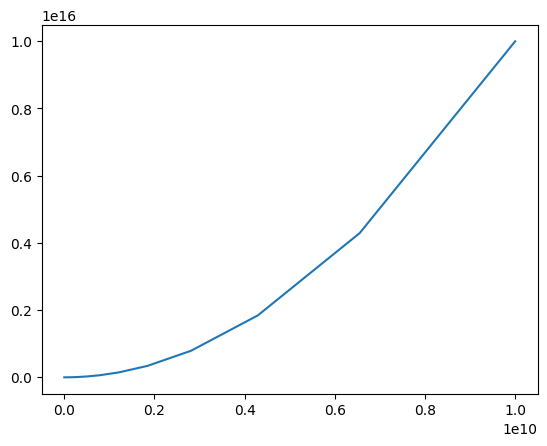

In [5]:
# The above plot could be better shown in a log plot
logspc = pl.logspace(1, 10, 50, base = 10)
print(logspc)

pl.plot(logspc, fn2(logspc))

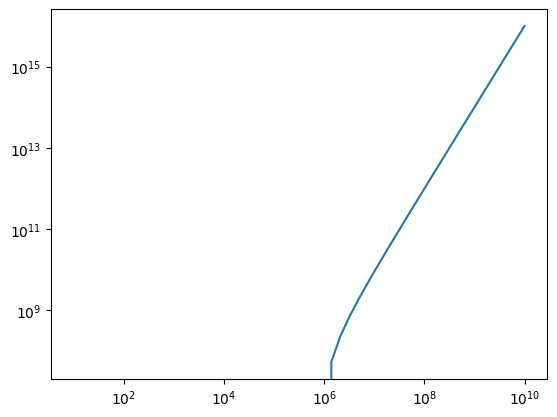

In [6]:
# We can see this on a log-log plot too, with the loglog function
pl.loglog(logspc, fn2(logspc))

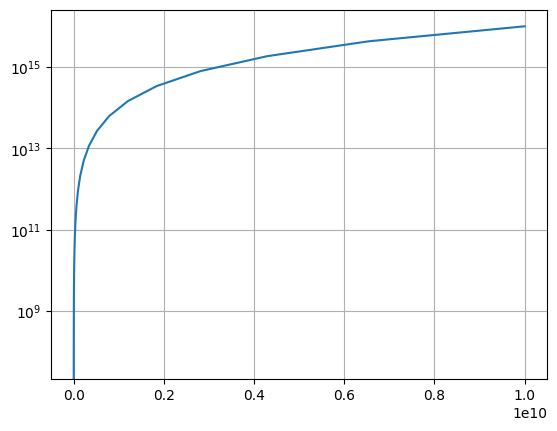

In [7]:
# Otherwise we can just change the scale of the y axis to log
pl.plot(logspc, fn2(logspc))
pl.yscale("log")
pl.grid()

The function at 1e6 is 2.7182804690957534, while e is 2.718281828459045


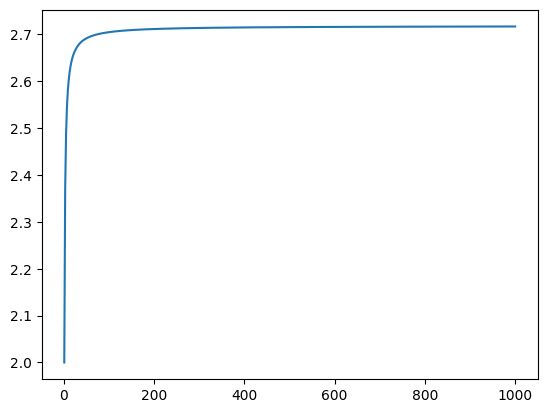

In [30]:
# Function 3 - f(x) = (1 + 1/x)^x
def fn3(x):
    return (1 + (1 / x)) ** x

pl.plot(space, fn3(space)) # This tends to something larger than 2.7... e!

print(f"The function at 1e6 is {fn3(1e6)}, while e is {pl.e}")

The function at 1e6 is 0.36787925722106646, while 1/e is 0.36787944117144233


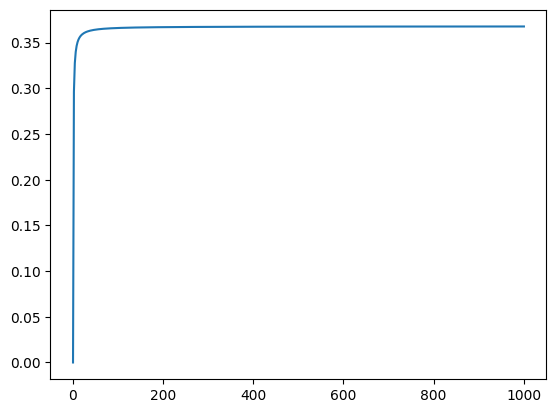

In [34]:
# Function 4 - f(x) = (1 - 1/x)^x
def fn4(x):
    return (1 - (1 / x)) ** x

pl.plot(space, fn4(space))
# This tends to 1 / e!

print(f"The function at 1e6 is {fn4(1e6)}, while 1/e is {1 / pl.e}")

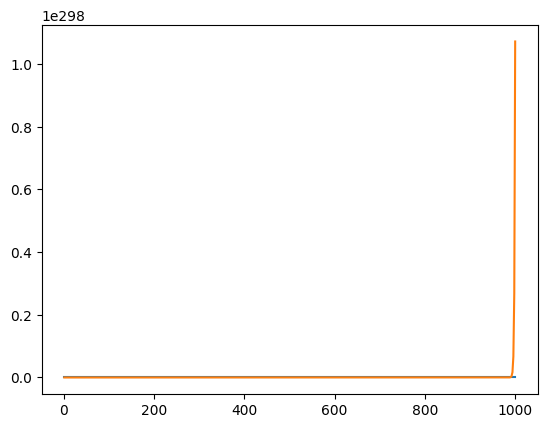

In [39]:
# Function 5: (a ** x -1) / x
def fn5(x, a):
    return (a ** x - 1) / x

pl.plot(space, fn5(space, 0.5))
pl.plot(space, fn5(space, 2))

In [42]:
# it's hard to see what the function does, as we need to vary "a".
# The sympy (symbolic python) package helps:
import sympy as sp

a, x = sp.symbols("a x") # Now the a and x variables hold these "symbols"

# We can now use the "limit" function to calculate the limit
# the signature is limit(fun, symbol_to_vary, limit)
sp.limit((a ** x -1) / x, x, 0)

log(a)

In [ ]:
# The function tends to log(a) when going to zero!

### Exercise -- Do the above with these functions:
- Function 6: $\lim_{x \to \infty} (1+\frac{a}{x})^{bx}$
- Function 7: $\lim_{x \to \infty} x^{\frac{1}{x}}$
- Function 8: $\lim_{x \to 0} \frac{a^x-1}{x}$
- Function 9: $\lim_{x \to 0} x^{\frac{\ln{x+1}}{x}}$
- Function 10: $\lim_{x \to 0} x^{\frac{\sin{ax}}{x}}$

exp(a*b)
If a = 10 and b = 10, then the function results in 2.688139249082122e+43, and pl.e ** (10 * 10) is 2.6881171418161212e+43


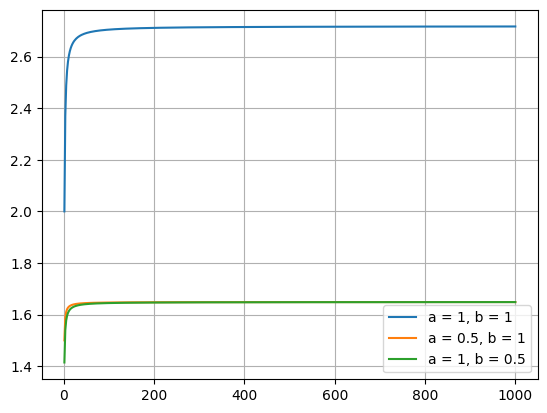

In [62]:
# Function 6: (1 + (a / x)) ** (b * x)

def fn6(x, a, b):
    return (1 + (a / x)) ** (b * x)

pl.plot(space, fn6(space, 1, 1), label = "a = 1, b = 1")
pl.plot(space, fn6(space, 0.5, 1), label = "a = 0.5, b = 1")
pl.plot(space, fn6(space, 1, 0.5), label = "a = 1, b = 0.5") 
pl.grid()
pl.legend()

# Hard to see, but they all tend at some number...

## Let's solve this symbolically!
a, b = sp.symbols("a b")

print(sp.limit((1 + (a / x)) ** (b * x), x, "oo"))

# Let's see if this works
print(f"If a = 10 and b = 10, then the function results in {fn6(1e10, 10, 10)}, and pl.e ** (10 * 10) is {pl.e ** (10 * 10)}")

1.0000138156059926


1

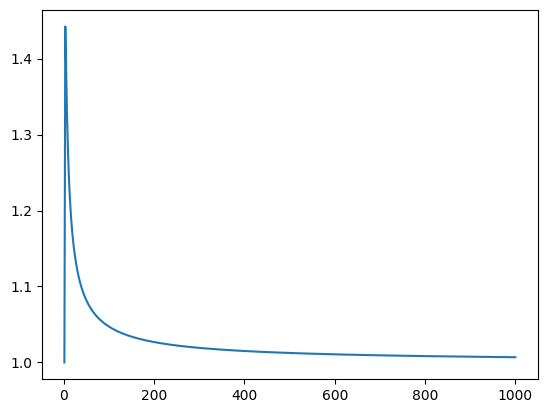

In [64]:
# Function 7: x ** (1 / x)
def fn7(x):
    return x ** (1 / x)

pl.plot(space, fn7(space)) # This tends to 1
print(fn7(1e6))

sp.limit(x ** (1 / x), x, "oo") # Yep!

102.3


0

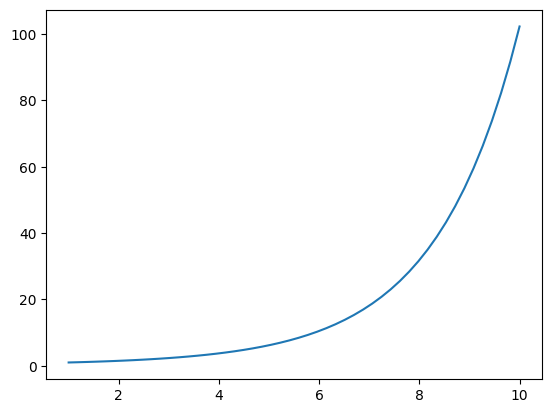

In [74]:
# Function 8: (a ** x - 1) / x
small_space = pl.linspace(1, 10, 50)

def fn8(x, a):
    return (a ** x - 1) / x

pl.plot(small_space, fn8(small_space, 2)) # This tends to + infinity if a > 0
print(fn8(10, 2))

#sp.limit((a ** x - 1) / x, x, "oo") # This returns an interesting error!
print(sp.limit((2 ** x - 1) / x, x, "oo"))
print(sp.limit(((0.5) ** x - 1) / x, x, "oo"))

In [76]:
# Function 9

In [78]:
# Function 10

## How fast do we get to infinity?

It can also be important to know how *fast* the function goes to infinity.

For instance, take these two:
$$
f(x) = 2 + \frac{1}{x}\\
g(x) = 2 + \frac{1}{\log{x}}
$$
$f(x)$ goes down faster than $g(x)$, as $\frac{1}{x}$ goes to 0 faster than $\frac{1}{\log{x}}$.

The convergence function tells us how fast the function goes to its limit.

To see this visually, we can plot:

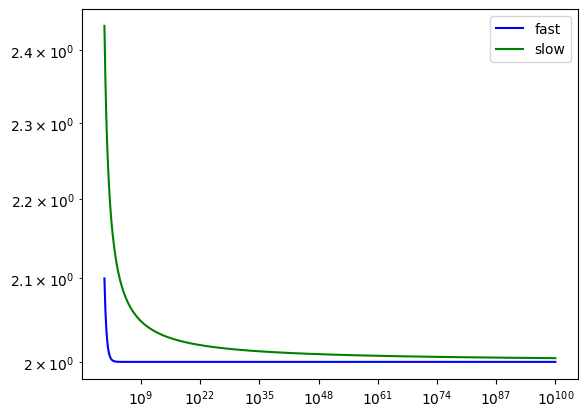

In [84]:
lspc = pl.logspace(1, 100, 500)

def fast(x):
    return 2 + (1 / x)

def slow(x):
    return 2 + (1 / pl.log(x))

pl.loglog(lspc, fast(lspc), "b", label = "fast")
pl.loglog(lspc, slow(lspc), "g", label = "slow")
pl.legend()
# They both tend to 2 (they converge), but at wildly different rates.

What if we have a function, $f(t)$, of which $\lim_{t \to \infty} f(t) = \infty$, and we want to find a function, $g(t)$, that, when dividing $f(t)$, results in a constant $c$ such that $0 < c < \infty$. The function $g(t)$ would then be the *rate of convergence* of $f(x)$.

For example:
- for $f(x) = 0.1x^2 + 100x + 10$, the rate of converge is $g(x) = x^2$.
- for $f(x) = \frac{0.3}{x} \cdot \frac{100}{x^2}$, the ROC is $g(x) = \frac{1}{x}$ (since the term that goes to 0 *slower* is $\frac{1}{x}$)

Let's see this last example:

0.9787467836832897


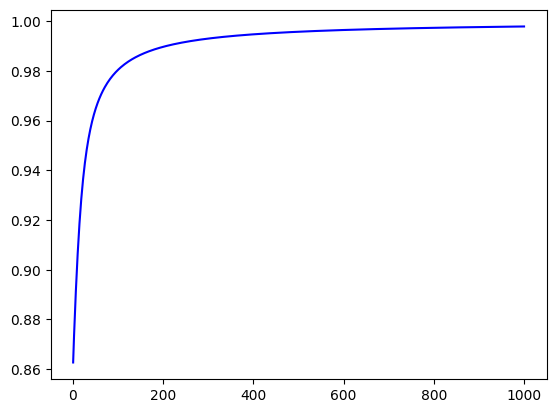

In [104]:
sml_spc = pl.linspace(1, 1000, 500)

# I call it fxx to not overwrite other stuff
def ffx(x):
    return 0.3 / x * 100 / (x ** 2)

def gx(x):
    return 1 / x

pl.plot(sml_spc, fast(lspc) / slow(lspc), "b")
# See how it goes to 1?

print(fast(1e10) / slow(1e10))

## Exercise:

Find the convergence functions of the following functions:
- $10 x ^3 + 3 x^2 + 28$ 
- $\frac{x^3 + 3 x^2 + 28}{x + 2}$
- $\frac{x^2 + 2}{x^3 + 3x^2+28}$
- $\exp{x + x^3}$
- $\exp{x + 3^x}$
- $x^2 + 4x + \log{x}+10$
- $4x + \log{x}+10$
- $\frac{1}{\log{x}}+\frac{1}{x}+\frac{1}{\sqrt{x}}$

If you're stuck, use `sympy` to test your solutions.

Solutions:
- $10x ^3 + 3 x^2 + 28$ is $x^3$
- $\frac{x^3 + 3 x^2 + 28}{x + 2}$ is $x^2$
- $\frac{x^2 + 2}{x^3 + 3x^2+28}$ is $\frac{1}{x}$
- $\exp{x} + x^3$ is $\exp{x}$
- $\exp{x} + 3^x$ is $3^x$
- $x^2 + 4x + \log{x}+10$ is $x^2$
- $4x + x\log{x} + 10$ is $x \cdot \log{x}$
- $\frac{1}{\log{x}}+\frac{1}{x}+\frac{1}{\sqrt{x}}$ is $\frac{1}{\log{x}}$